In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [3]:
x = zp
y = ks

#### C использованием intercept:

$$b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};$$

$$a = \overline{y} - b \cdot {\overline{x}}.$$

In [4]:
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x)**2)
b

2.620538882402765

In [5]:
a = np.mean(y) - b * np.mean(x)
a

444.1773573243596

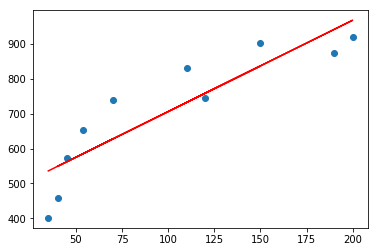

In [6]:
plt.scatter(x, y)
plt.plot(x, a + x * b, 'r')
plt.show()

#### Без использования intercept:

In [7]:
xr = x.reshape((1, 10))
xr

array([[ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110]])

In [8]:
yr = y.reshape((1, 10))
yr

array([[401, 574, 874, 919, 459, 739, 653, 902, 746, 832]])

In [9]:
b1 = np.linalg.inv(xr @ xr.T) @ xr @ yr.T
b1

array([[5.88982042]])

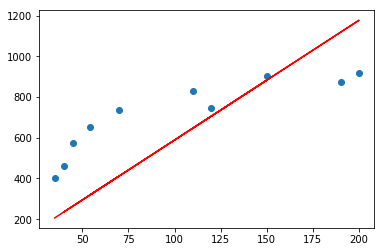

In [10]:
plt.scatter(x, y)
plt.plot(x, x * b1[0], 'r')
plt.show()

### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [11]:
def mse_(w1, n=10):
    return np.sum((w1 * x - y)**2) / n

In [53]:
alpha = 1e-6
n = 10
w1 = 0.1

In [54]:
for i in range(1000):
    w1 -= alpha * (2 / n) * np.sum((w1 * x - y) * x)
    if i % 100 == 0:
        print(f'Iteration: {i}; w1 = {w1:.5f}; mse = {mse_(w1):.5f}')

Iteration: 0; w1 = 0.25953; mse = 493237.72125
Iteration: 100; w1 = 5.54538; mse = 58151.31823
Iteration: 200; w1 = 5.86875; mse = 56522.97550
Iteration: 300; w1 = 5.88853; mse = 56516.88131
Iteration: 400; w1 = 5.88974; mse = 56516.85850
Iteration: 500; w1 = 5.88982; mse = 56516.85842
Iteration: 600; w1 = 5.88982; mse = 56516.85842
Iteration: 700; w1 = 5.88982; mse = 56516.85842
Iteration: 800; w1 = 5.88982; mse = 56516.85842
Iteration: 900; w1 = 5.88982; mse = 56516.85842


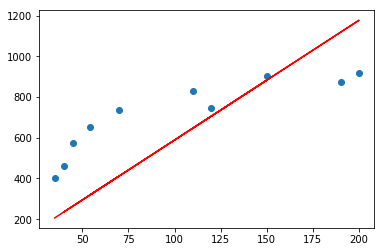

In [14]:
plt.scatter(x, y)
plt.plot(x, x * w1, 'r')
plt.show()

### 3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Таблица значений функции Лапласа используется при большом количестве наблюдений, а таблица критических точек распределения Стьюдента используется когда количество наблюдений меньше 30.

### *4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [34]:
alpha = 3e-5
n = 10
w0 = 0.1
w1 = 0.1

In [35]:
for i in range(1000001):
    w0 -= alpha * ((2 / n) * np.sum(((w0 + w1 * x) - y) * 1))
    w1 -= alpha * ((2 / n) * np.sum(((w0 + w1 * x) - y) * x))
    if i % 100000 == 0:
        print(f'Iteration: {i}; w0 = {w0:.5f}; w1 = {w1:.5f}; mse = {mse_(w1):.5f}')

Iteration: 0; w0 = 0.14198; w1 = 4.88498; mse = 70427.18913
Iteration: 100000; w0 = 347.25591; w1 = 3.33391; mse = 146514.75771
Iteration: 200000; w0 = 423.02156; w1 = 2.77625; mse = 190071.41856
Iteration: 300000; w0 = 439.55952; w1 = 2.65453; mse = 200718.16809
Iteration: 400000; w0 = 443.16939; w1 = 2.62796; mse = 203096.39915
Iteration: 500000; w0 = 443.95734; w1 = 2.62216; mse = 203618.10045
Iteration: 600000; w0 = 444.12933; w1 = 2.62089; mse = 203732.09949
Iteration: 700000; w0 = 444.16687; w1 = 2.62062; mse = 203756.98882
Iteration: 800000; w0 = 444.17507; w1 = 2.62056; mse = 203762.42188
Iteration: 900000; w0 = 444.17686; w1 = 2.62054; mse = 203763.60782
Iteration: 1000000; w0 = 444.17725; w1 = 2.62054; mse = 203763.86668


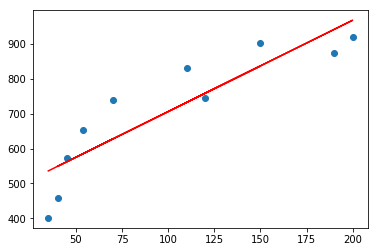

In [36]:
plt.scatter(x, y)
plt.plot(x, w0 + x * w1, 'r')
plt.show()